In [1]:
import numpy as np
import porepy as pp
import scipy.sparse as sps
import math 
import sys
sys.path.append("../class")
from Flow_class import Flow
from Transport_class import Transport
from Reaction_class import Reaction

In [2]:
Nx=100
Ny=5

In [3]:
#gb= pp.grid_buckets_2d.single_vertical([Nx, Ny], y_endpoints=[0.6, 0.2], simplex=False)
#gb, domain = pp.grid_buckets_2d.single_horizontal([Nx, Ny], x_endpoints=[0.2, 0.8], simplex=False)
#print(domain)
#pp.plot_grid(gb,figsize=[15,12])
#domain={'xmin': 0, 'xmax': 1, 'ymin': 0, 'ymax': 1}




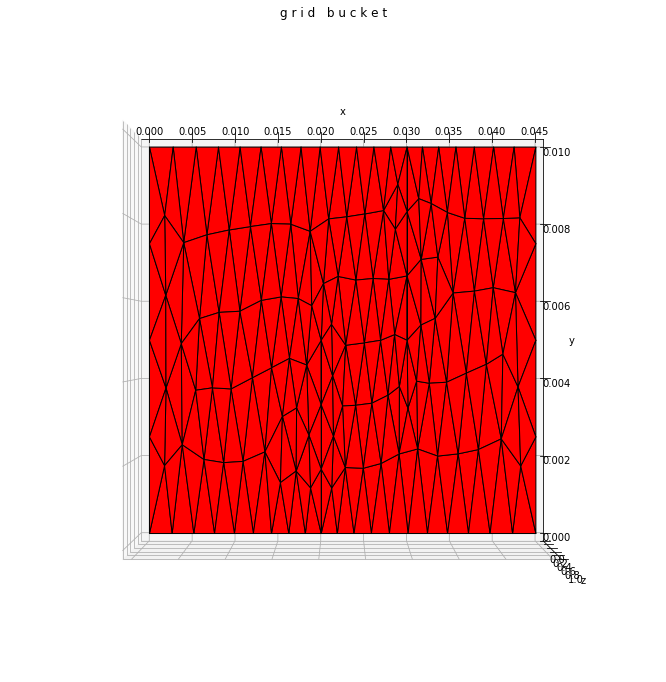

In [4]:
# Point coordinates, as a 2xn array
p = np.array([[0.02,0.02,0.03,0.03], [0,0.005,0.005,0.01]])
# Point connections as a 2 x num_frac arary
e = np.array([[0, 2], [1, 3]])

# The domain contains two fractures: The first from (0, 0) - (2,0), the second (1, 0) to (1, 1)
# Set domain boundaries
domain = {'xmin': 0, 'xmax': 0.045, 'ymin': 0, 'ymax': 0.01}

# Define a fracture network in 2d
network_2d = pp.FractureNetwork2d(p, e, domain)

# Set preferred mesh size close to the fracture, and at the boundary (essentially this is a far-field value)
#mesh_args = {'mesh_size_frac': 0.002, 'mesh_size_bound': 0.003}
mesh_args = {'mesh_size_frac': 0.002, 'mesh_size_bound': 0.003}


# Generate a mixed-dimensional mesh
gb = network_2d.mesh(mesh_args)
pp.plot_grid(gb,figsize=(15,12))

In [5]:
parameter={"aperture":1e-3,
           "fracture_perm":1.0,
          #"fracture_perm_2":1e5,
           #"fracture_perm":1e5,
          #"fracture_perm":0.001,
           "perm":0.3,
           #"perm":1,
          
          #"f_lambda":lambda x,y,z:math.pi*math.pi*2*math.sin(math.pi*x)*math.sin(math.pi*y),
          "f_lambda":lambda x,y,z:0.0,
          "bc_value":[5.0e-9,0.0],
           #"bc_value":[0.0,0.0],
          "bc_type":['dir','dir'],
          "method":"Tpfa"}

matrix permeability
[0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.

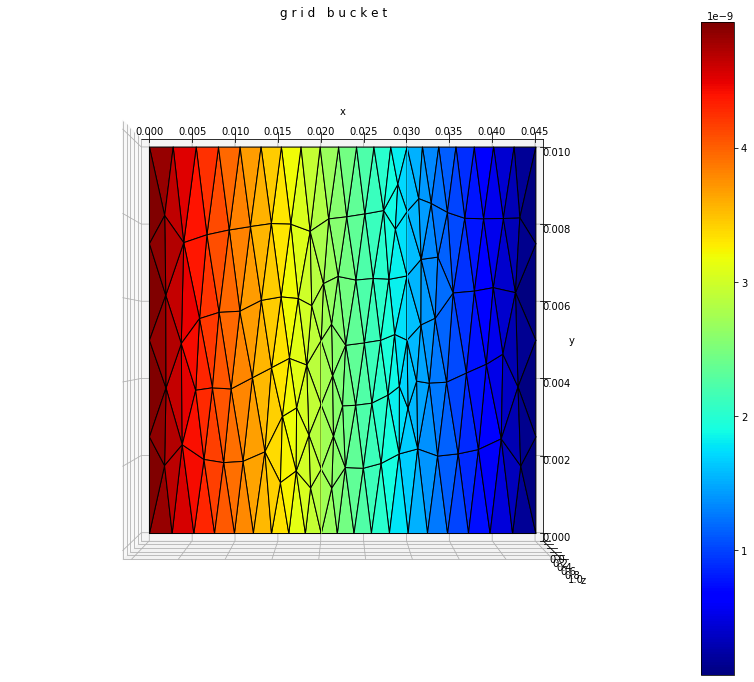

In [6]:
flow=Flow(gb,domain,parameter)
#flow.add_data()
flow.set_data()
flow.discretize()
flow.solve()
flow.plot_pressure()

In [7]:
parameter={
    "aperture":1e-3,
    "por":0.3,
    "por_frac":0.00001,
    #"por":1.0,
    #"por_frac":1.0,
    #"time_step":1 / 60,
    "time_step":34.56,
    #"time_step":0.001,
    #"t_max":1 /3,
    "t_max":345600,
    #"t_max":0.1,
    "initial_cond":lambda x,y,z:0.0}

transport=Transport(gb,domain,parameter)

In [8]:
Ca_value=[0.0,0.0]
Ca_type=['dir','dir']
CaSiO3_value=[0.0,0.0]
CaSiO3_type=['dir','dir']
Ca="Ca"
CaSiO3="CaSiO3"

In [9]:
reaction_data={"temperature":423,
       "A":1.9e-2,
       #"rate_const":0.00446,
       "rate_const":0.0005,
       "E":4700,
       "R":8.314,
       "K_eq":10e9,
       "ph":3.5,
       "mass_weight":0.3*1.0}
reaction=Reaction(reaction_data)
reaction.set_const_rate()
print(reaction.const_rate)

2.4964205820053154e-06


In [10]:
transport.set_data(Ca_value,Ca_type,Ca)
transport.get_flux(Ca)
transport.discretize(Ca)
lhs_Ca,rhs_source_adv_Ca,rhs_mass_Ca,assembler_Ca=transport.get_transport_lhs_rhs(Ca)
#ciao?1



In [11]:
for g,d in gb:
    print(d[pp.PARAMETERS]["Ca"]["darcy_flux"])

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.87730548e-11
  3.83490932e-11  0.00000000e+00 -1.71978145e-11  2.63787533e-11
 -5.17694208e-11  3.34761507e-11  1.65807332e-11  0.00000000e+00
 -5.11870154e-11  1.57955553e-11 -6.79546954e-12  3.11510732e-11
 -3.57095179e-11  0.00000000e+00  0.00000000e+00  0.00000000e+00
  4.30978151e-11  3.49995290e-11  0.00000000e+00 -8.32143194e-11
 -5.65966934e-11  0.00000000e+00  8.38525257e-11  5.69443941e-11
  8.36135645e-11  0.00000000e+00  5.74337846e-11  0.00000000e+00
 -8.57646562e-11 -5.88724526e-11  0.00000000e+00  5.18566121e-11
 -3.83490932e-11  0.00000000e+00  4.21807087e-11 -5.18566121e-11
  0.00000000e+00 -4.21807087e-11  6.76764525e-11  0.00000000e+00
 -6.30714515e-11  6.76764525e-11  0.00000000e+00 -6.30714515e-11
 -6.19587863e-11  0.00000000e+00  6.33695303e-11  6.19587863e-11
  0.00000000e+00 -6.33695303e-11  7.47475766e-11 -7.47475766e-11
  5.65966934e-11  0.00000000e+00 -5.60767582e-11  3.87730548e-11
  0.00000000e+00  5.53023

In [12]:
print(rhs_source_adv_Ca)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


P0_flux
[[ 3.29856566e-08  3.34299197e-08  3.26394405e-08  3.26794979e-08
   3.24266185e-08  3.23759833e-08  3.06777890e-08  3.24386501e-08
   3.28741940e-08  3.34313354e-08  3.23837990e-08  3.25588105e-08
   3.25308551e-08  3.21281883e-08  3.24042276e-08  3.21703414e-08
   2.99629296e-08  3.18854644e-08  3.19933627e-08  3.18091620e-08
   3.22947948e-08  3.36650244e-08  3.28774073e-08  3.27828341e-08
   3.28354833e-08  3.38849264e-08  3.34935190e-08  3.24066549e-08
   3.22702500e-08  3.30780652e-08  3.27853590e-08  3.15816189e-08
   3.24828692e-08  3.30331883e-08  3.25094553e-08  3.18819419e-08
   3.39172393e-08  3.24566213e-08  3.23447670e-08  3.39556572e-08
   3.24993397e-08  3.25440873e-08  3.35166420e-08  3.24097742e-08
   3.31957110e-08  3.05601523e-08  3.21417301e-08  3.23742089e-08
   3.28082898e-08  3.29380348e-08  3.22196683e-08  3.26261843e-08
   3.27475070e-08  3.14458622e-08  3.29191817e-08  3.27252412e-08
   3.39836423e-08  3.12951078e-08  3.32050416e-08  3.25846521e-08
  

/home/dell/anaconda3/lib/python3.8/site-packages/porepy/viz/plot_grid.py:127: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


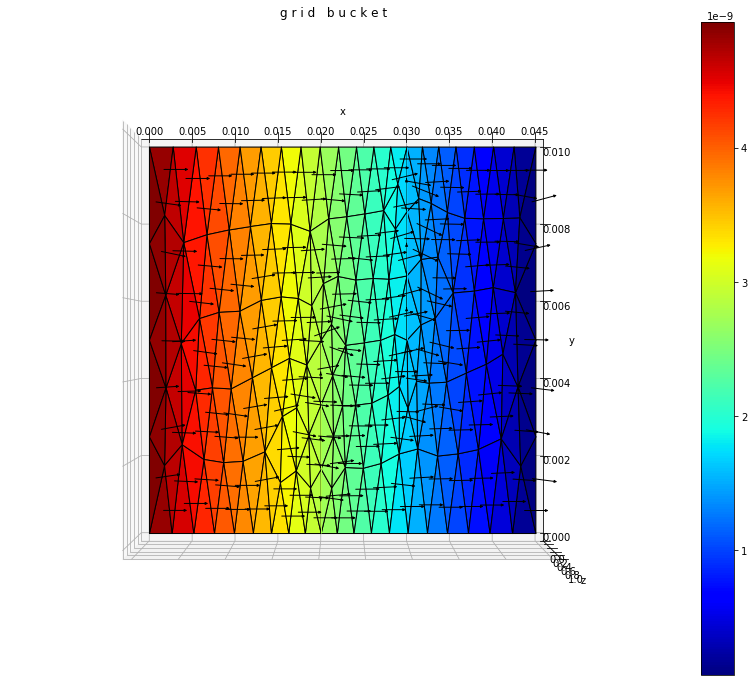

In [13]:
## to export the flux
key='Ca'
flux='darcy_flux'
mortar='mortar_flux'
flux_P0="P0_flux"

discr_P0_flux = pp.MVEM(key)
for g, d in gb:
    discr_P0_flux.discretize(g, d)
    d[pp.STATE][flux] = d[pp.PARAMETERS][key][flux]

## construct the P0 flux reconstruction
pp.project_flux(gb, discr_P0_flux, flux, flux_P0, mortar)

for g,d in gb:
    print("P0_flux")
    print(d[pp.STATE]["P0_flux"])

for g,d in gb:
    print("pressure")
    print(d[pp.STATE]["pressure"])
    
for g,d in gb:
    d[pp.STATE]["P0_flux"]*=100000
pp.plot_grid(gb,"pressure","P0_flux",figsize=(15,12))

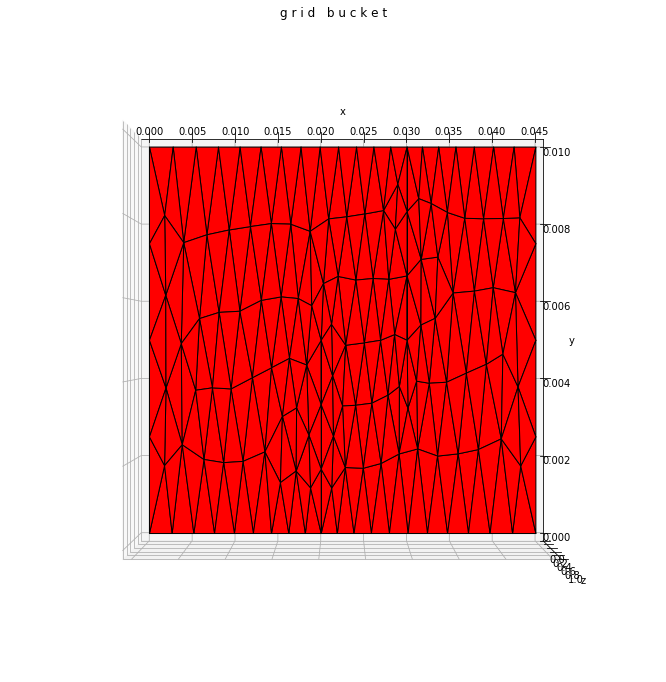

In [14]:
# Point coordinates, as a 2xn array
p = np.array([[0.02,0.02,0.03,0.03], [0,0.005,0.005,0.01]])
# Point connections as a 2 x num_frac arary
e = np.array([[0, 2], [1, 3]])

# The domain contains two fractures: The first from (0, 0) - (2,0), the second (1, 0) to (1, 1)
# Set domain boundaries
domain = {'xmin': 0, 'xmax': 0.045, 'ymin': 0, 'ymax': 0.01}

# Define a fracture network in 2d
network_2d = pp.FractureNetwork2d(p, e, domain)

# Set preferred mesh size close to the fracture, and at the boundary (essentially this is a far-field value)
#mesh_args = {'mesh_size_frac': 0.002, 'mesh_size_bound': 0.003}
mesh_args = {'mesh_size_frac': 0.002, 'mesh_size_bound': 0.003}


# Generate a mixed-dimensional mesh
gb1= network_2d.mesh(mesh_args)
pp.plot_grid(gb,figsize=(15,12))

In [15]:
parameter={"aperture":1e-3,
           "fracture_perm":1.0,
          #"fracture_perm_2":1e5,
           #"fracture_perm":1e5,
           #"fracture_perm":1.0,
           "perm":0.3,
           #"perm":1.0,
           #"f_lambda":lambda x,y,z:math.pi*math.pi*2*math.sin(math.pi*x)*math.sin(math.pi*y),
          "f_lambda":lambda x,y,z:0.0,
          #"bc_value":[3.0e-7,0.0],
          "bc_value":[0.0,0.0],
          "bc_type":['dir','dir'],
          "method":"Tpfa"}

matrix permeability
[0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.

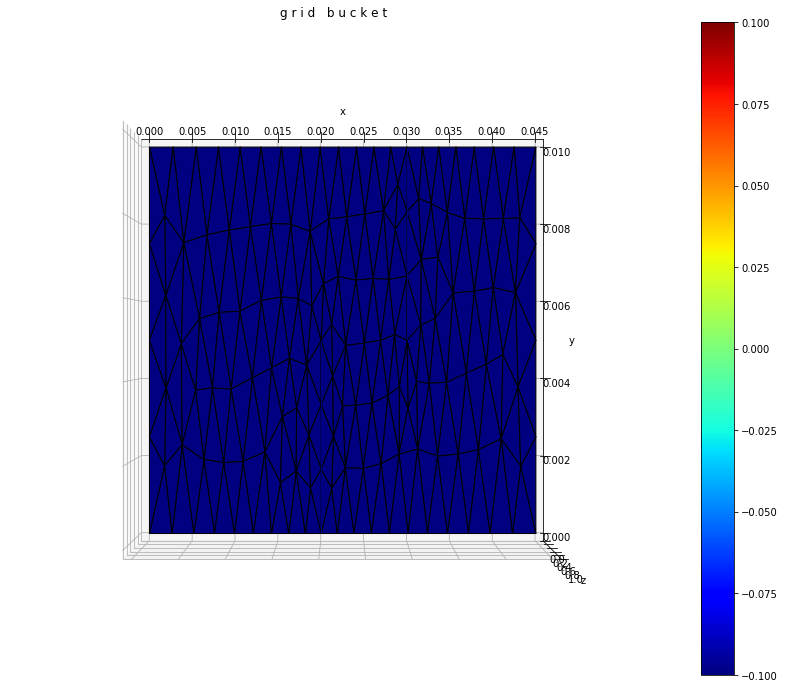

In [16]:
flow=Flow(gb1,domain,parameter)
#flow.add_data()
flow.set_data()
flow.discretize()
flow.solve()
flow.plot_pressure()

In [17]:
parameter={
    "aperture":1e-3,
    "por":0.3,
    "por_frac":0.00001,
    #"por":1.0,
    #"por_frac":1.0,
    #"time_step":1 / 60,
    "time_step":34.56,
    #"time_step":0.001,
    #"t_max":1 /3,
    "t_max":345600,
    #"t_max":0.1,
    "initial_cond":lambda x,y,z:0.0}

transport_CaSiO3=Transport(gb1,domain,parameter)

In [18]:
transport_CaSiO3.set_data(CaSiO3_value,CaSiO3_type,CaSiO3)
transport_CaSiO3.get_flux(CaSiO3)    
transport_CaSiO3.discretize(CaSiO3)
lhs_CaSiO3,rhs_source_adv_CaSiO3,rhs_mass_CaSiO3,assembler_CaSiO3=transport_CaSiO3.get_transport_lhs_rhs(CaSiO3)

In [19]:
save_every = 100
n_steps = int(np.round(parameter["t_max"] / parameter["time_step"]))

# Initial condition
tracer1 = np.zeros(rhs_source_adv_Ca.size)
assembler_Ca.distribute_variable(
    tracer1, variable_names=[Ca,transport.mortar_variable]
)

tracer2 = 16.7504*np.ones(rhs_source_adv_CaSiO3.size)
assembler_CaSiO3.distribute_variable(
    tracer2, variable_names=[CaSiO3,transport.mortar_variable]
)


# Exporter
exporter1 = pp.Exporter(gb, file_name="Ca", folder_name="Ca_zero_frac")
export_field1 = ["Ca"]
IEsolver_Ca = sps.linalg.factorized(lhs_Ca)

exporter2= pp.Exporter(gb1, file_name="CaSiO3", folder_name="CaSiO3_zero_frac")
export_field2 = ["CaSiO3"]
IEsolver_CaSiO3 = sps.linalg.factorized(lhs_CaSiO3)

/home/dell/.local/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


Ca
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Ca
[0. 0. 0.]
Ca
[0. 0. 0.]
CaSiO3
[16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 1

Ca
[0.70713111 0.70713111 0.70713111 0.70713111 0.70713108 0.70713088
 0.70713111 0.70713111 0.70713111 0.70713111 0.70713111 0.70713111
 0.70713111 0.70713111 0.70713111 0.70713098 0.70713111 0.70713111
 0.70713111 0.70713111 0.70713111 0.70713111 0.70713111 0.70713111
 0.70713111 0.70713111 0.70713081 0.70713111 0.70713111 0.70713111
 0.70713111 0.70713012 0.70713111 0.70713111 0.70713111 0.70713111
 0.70713111 0.70713111 0.70713111 0.70713111 0.70713111 0.70713111
 0.70713107 0.70713111 0.70713111 0.70713111 0.70713111 0.70713111
 0.70713111 0.70713111 0.70713111 0.70713111 0.70713111 0.70713111
 0.70683327 0.70713111 0.70713111 0.70713111 0.70713111 0.70713111
 0.70713111 0.70701469 0.70713111 0.70713111 0.70713111 0.70713111
 0.6805465  0.7071283  0.70713111 0.70708397 0.70713111 0.70713111
 0.70713111 0.70713111 0.70713111 0.70713111 0.69837879 0.70713111
 0.70713111 0.70713111 0.70713111 0.70713111 0.70713111 0.70713111
 0.70647885 0.70712377 0.70713111 0.70713111 0.70382038 0.7

Ca
[1.38375868 1.38376627 1.38376911 1.38376911 1.38372329 1.38357223
 1.38376791 1.38376904 1.38376911 1.38376911 1.38376909 1.38376911
 1.38376911 1.38376911 1.38376911 1.38364795 1.38376911 1.38376911
 1.38376911 1.38376911 1.3837691  1.38376911 1.38376911 1.38376911
 1.38376911 1.38376911 1.38351647 1.3837691  1.38376911 1.38376898
 1.38376911 1.38329011 1.38376911 1.38376911 1.38376911 1.38376904
 1.38376911 1.38376911 1.38376911 1.38376911 1.38376911 1.38376911
 1.38371017 1.38376911 1.38376911 1.38376883 1.38376911 1.38376911
 1.38376911 1.3837691  1.38376911 1.38376878 1.38376911 1.38376911
 1.36409487 1.38376911 1.38376911 1.38376911 1.38376911 1.3837691
 1.38376911 1.37434324 1.38376911 1.38376848 1.38376911 1.38376911
 1.11113884 1.38293718 1.38376911 1.37770565 1.38376893 1.38376911
 1.38376617 1.38376908 1.38376911 1.38376911 1.23097526 1.38376911
 1.38376911 1.38376765 1.38376911 1.38376911 1.38376911 1.38376911
 1.35587907 1.38194522 1.38376911 1.38376911 1.30838396 1.38

[14.71968683 14.71968683 14.71968683]
CaSiO3
[14.71968683 14.71968683 14.71968683]
FINE
rd
[2.48613282e-06 2.48612855e-06 2.48612585e-06 2.48612585e-06
 2.48614660e-06 2.48618620e-06 2.48612719e-06 2.48612599e-06
 2.48612585e-06 2.48612585e-06 2.48612590e-06 2.48612585e-06
 2.48612585e-06 2.48612585e-06 2.48612585e-06 2.48616575e-06
 2.48612586e-06 2.48612585e-06 2.48612585e-06 2.48612585e-06
 2.48612586e-06 2.48612585e-06 2.48612585e-06 2.48612585e-06
 2.48612585e-06 2.48612585e-06 2.48620011e-06 2.48612587e-06
 2.48612585e-06 2.48612606e-06 2.48612585e-06 2.48623369e-06
 2.48612585e-06 2.48612585e-06 2.48612585e-06 2.48612600e-06
 2.48612585e-06 2.48612585e-06 2.48612585e-06 2.48612585e-06
 2.48612585e-06 2.48612585e-06 2.48615147e-06 2.48612585e-06
 2.48612585e-06 2.48612630e-06 2.48612585e-06 2.48612585e-06
 2.48612585e-06 2.48612587e-06 2.48612585e-06 2.48612634e-06
 2.48612585e-06 2.48612585e-06 2.48753002e-06 2.48612585e-06
 2.48612585e-06 2.48612585e-06 2.48612585e-06 2.4861258

Ca
[2.63971497 2.64436858 2.64886383 2.64886383 2.62798397 2.60226864
 2.64632805 2.64843576 2.64886383 2.64886383 2.6486858  2.64886321
 2.64886383 2.64886383 2.64886296 2.61595803 2.64883986 2.64886383
 2.64886383 2.64886383 2.64880175 2.64886269 2.64886381 2.64886383
 2.64886349 2.64886383 2.59362008 2.64878357 2.64886383 2.64833161
 2.64886383 2.57983286 2.64886383 2.64886383 2.64886382 2.64839669
 2.64886383 2.6488638  2.64885505 2.64886383 2.64886381 2.64886382
 2.62399969 2.64886383 2.64886383 2.64777619 2.64886103 2.64886383
 2.64886383 2.64878784 2.64886383 2.64774325 2.64886376 2.64886383
 2.20128958 2.64886383 2.64886016 2.64886383 2.64886383 2.64883778
 2.64886383 2.35816464 2.64886383 2.64742501 2.64886383 2.64886383
 1.27187877 2.56475697 2.64886383 2.39567338 2.64793381 2.64886375
 2.64528487 2.64866533 2.64886382 2.64886383 1.53984034 2.64886383
 2.64886319 2.64617777 2.64886383 2.64886373 2.64885263 2.64886383
 2.1595623  2.50948647 2.6488618  2.64886172 1.8765615  2.6

Ca
[3.18755844 3.20910607 3.23919507 3.23919503 3.14222947 3.06101767
 3.22027637 3.23466129 3.23919507 3.23919507 3.2369226  3.23916992
 3.23919507 3.23919505 3.23916769 3.10552437 3.23870432 3.23919506
 3.23919499 3.23919507 3.23814324 3.2391578  3.23919358 3.23919507
 3.23918153 3.23919506 3.03480323 3.23798107 3.23919507 3.23405413
 3.23919507 3.00578134 3.23919507 3.23919506 3.23919451 3.23412545
 3.23919506 3.23919345 3.23900976 3.23919507 3.23919356 3.23919407
 3.12742629 3.23919507 3.23919507 3.22942753 3.2391228  3.23919507
 3.23919507 3.23811763 3.23919507 3.229456   3.23919085 3.23919507
 2.32571119 3.23919507 3.23909704 3.23919507 3.23919507 3.23874418
 3.23919498 2.58011417 3.23919507 3.22781953 3.23919507 3.23919504
 1.23544642 2.97495262 3.23919507 2.63255388 3.23030109 3.23919152
 3.21584364 3.23686515 3.23919458 3.23919506 1.51273133 3.23919475
 3.23916994 3.21987758 3.23919507 3.23919013 3.23895032 3.23919506
 2.28028944 2.84579809 3.23912717 3.23912641 1.91216331 3.2

Ca
[3.63008137 3.68848442 3.80273063 3.80272888 3.52287992 3.35810863
 3.72410068 3.77790028 3.80273063 3.80273063 3.78835581 3.80234409
 3.80273063 3.80272995 3.80236978 3.45091168 3.79832205 3.80273036
 3.80272799 3.80273062 3.79458128 3.80223364 3.80269284 3.80273059
 3.80251749 3.80273012 3.306825   3.79398983 3.80273063 3.77615591
 3.80273062 3.26612574 3.80273063 3.80273026 3.80271608 3.77468577
 3.80273049 3.80269506 3.80096052 3.80273057 3.80269275 3.80270558
 3.48909404 3.80273063 3.80273063 3.7559258  3.80192001 3.80273063
 3.80273063 3.79521622 3.80273061 3.75700237 3.80264034 3.80273061
 2.32955387 3.80273062 3.80162195 3.80273057 3.80273063 3.79904982
 3.80272744 2.65274914 3.80273063 3.752466   3.80273063 3.80272952
 1.18751523 3.2214882  3.80273063 2.71141195 3.7584589  3.80266583
 3.71377189 3.78870541 3.80271595 3.80273051 1.45934334 3.80272126
 3.8023512  3.72431245 3.80273063 3.80263912 3.80037104 3.80273021
 2.28709391 3.00926783 3.8018381  3.80184123 1.87828624 3.8

Ca
[3.93071771 4.04196007 4.34052411 4.34049206 3.74660879 3.49470413
 4.11908884 4.2531944  4.34052416 4.34052403 4.28389581 4.33744965
 4.34052408 4.34050981 4.33791179 3.64013096 4.31784934 4.34051777
 4.34048153 4.3405239  4.30329353 4.33694201 4.3400731  4.34052312
 4.33876287 4.34051377 3.41869763 4.30241943 4.34052418 4.2503692
 4.340524   3.37424802 4.34052417 4.3405162  4.34034223 4.2418747
 4.34052063 4.34013624 4.33067716 4.34052262 4.34007447 4.34022142
 3.69037615 4.34052417 4.34052418 4.1932085  4.33538255 4.34052417
 4.34052418 4.30813313 4.34052359 4.19821024 4.33958699 4.34052336
 2.27371269 4.34052382 4.33354444 4.34052229 4.34052417 4.32250017
 4.34047233 2.63185732 4.34052406 4.19008552 4.34052416 4.34050327
 1.13838643 3.32155837 4.34052415 2.69083994 4.19791149 4.33991037
 4.10361868 4.28677759 4.34032277 4.34052124 1.40042681 4.34039327
 4.33753061 4.12273841 4.34052418 4.33965861 4.32748632 4.34051434
 2.23563759 3.0412338  4.33430177 4.3343801  1.816518   4.340

[11.89675676 11.89675662 11.89675631]
FINE
rd
[2.45479961e-06 2.45133235e-06 2.43761031e-06 2.43761810e-06
 2.45984027e-06 2.46570615e-06 2.44857968e-06 2.44293309e-06
 2.43761029e-06 2.43761036e-06 2.44141265e-06 2.43797872e-06
 2.43761033e-06 2.43761422e-06 2.43790726e-06 2.46230929e-06
 2.43949560e-06 2.43761225e-06 2.43761971e-06 2.43761042e-06
 2.44041097e-06 2.43801128e-06 2.43768590e-06 2.43761067e-06
 2.43783157e-06 2.43761311e-06 2.46733467e-06 2.44039544e-06
 2.43761028e-06 2.44298514e-06 2.43761036e-06 2.46804657e-06
 2.43761029e-06 2.43761255e-06 2.43764272e-06 2.44356754e-06
 2.43761143e-06 2.43767191e-06 2.43850705e-06 2.43761085e-06
 2.43768546e-06 2.43766225e-06 2.46127666e-06 2.43761028e-06
 2.43761028e-06 2.44568660e-06 2.43813326e-06 2.43761029e-06
 2.43761028e-06 2.43998620e-06 2.43761052e-06 2.44538598e-06
 2.43774992e-06 2.43761063e-06 2.48440312e-06 2.43761043e-06
 2.43830738e-06 2.43761100e-06 2.43761029e-06 2.43908414e-06
 2.43762175e-06 2.48002803e-06 2.437610

Ca
[4.11123916 4.32312256 5.3431371  5.34110332 3.80463791 3.44284026
 4.49864909 4.88133835 5.34314759 5.34311537 4.9912858  5.29014806
 5.34312621 5.3420115  5.30147325 3.65982746 5.14040407 5.34252324
 5.34084774 5.34309105 5.06350035 5.28805443 5.32880453 5.34300648
 5.30967387 5.34233083 3.33837558 5.06961415 5.34315403 4.8825322
 5.34311642 3.30115962 5.34315025 5.3424652  5.33655056 4.83007045
 5.34276483 5.33178256 5.23818473 5.34294257 5.32890071 5.33298662
 3.71538762 5.34315277 5.34315409 4.68664381 5.27619472 5.3431514
 5.34315415 5.107955   5.34305327 4.71227009 5.31916636 5.34300685
 2.10747109 5.34309039 5.25591888 5.34288114 5.34315151 5.1846813
 5.3403625  2.47228485 5.34312812 4.70241569 5.34314655 5.34173252
 1.04466279 3.24627621 5.34314298 2.52644314 4.69330412 5.32830159
 4.48838966 5.01483359 5.3351347  5.34283168 1.28561359 5.33762458
 5.29159088 4.52043587 5.34315376 5.32287398 5.20956068 5.34224505
 2.07554098 2.90347565 5.25612052 5.2579062  1.67457361 5.3365

Ca
[4.05244555 4.29356133 5.80997579 5.8009715  3.71704297 3.33737383
 4.50504255 5.00722336 5.81005509 5.80981162 5.16293646 5.66907208
 5.80988679 5.80455367 5.69972239 3.56797051 5.38859083 5.80677015
 5.80034673 5.80964978 5.26445535 5.66786614 5.76194392 5.80919805
 5.71624925 5.80606168 3.22918969 5.28069613 5.81011217 5.01451695
 5.80983557 3.19659831 5.81007768 5.80660469 5.78622453 4.92881659
 5.80793966 5.77230326 5.57206364 5.80882881 5.76226751 5.77479857
 3.62098108 5.81009982 5.81011313 4.74021995 5.64615859 5.8100855
 5.81011381 5.34842969 5.80944077 4.77969459 5.73616214 5.80913106
 2.0207987  5.80967645 5.60216194 5.80844231 5.81008785 5.47595703
 5.79838009 2.37541094 5.80991606 4.77297425 5.81004319 5.80354574
 1.00062786 3.14360273 5.81001312 2.42700578 4.74607861 5.76381444
 4.50419601 5.20505588 5.78063792 5.80830138 1.23147215 5.78906015
 5.67248733 4.5381711  5.81010955 5.74842381 5.51483578 5.80545236
 1.99072463 2.79715183 5.5969424  5.60148301 1.60473644 5.78

Ca
[3.94217582 4.19746318 6.25476152 6.22478762 3.59615693 3.21461309
 4.43053455 5.0224189  6.25518381 6.25389719 5.21674685 5.95060816
 6.25426416 6.23536667 6.01482799 3.44835689 5.51217312 6.24247846
 6.2238707  6.25314278 5.34119678 5.95371961 6.12911433 6.25140781
 6.04194381 6.24058583 3.10681489 5.37077171 6.2555367  5.03701877
 6.25408477 3.07774642 6.25531791 6.24220839 6.18790191 4.91873529
 6.2466204  6.15596424 5.80004669 6.24987237 6.12989842 6.15952037
 3.49817929 6.25545329 6.2555458  4.69704368 5.92097529 6.25535241
 6.25555076 5.4715235  6.25231938 4.74909005 6.07502636 6.25088213
 1.93648336 6.2533872  5.84284801 6.2481824  6.25537514 5.65364495
 6.21787038 2.27832321 6.2544798  4.74682225 6.25509833 6.23263619
 0.95843822 3.02700785 6.25492494 2.32758808 4.70157627 6.13951269
 4.43969363 5.27924158 6.17184848 6.24803346 1.1795824  6.19355216
 5.95685748 4.47332796 6.25551935 6.10506962 5.70528831 6.23791447
 1.90788648 2.68610458 5.82611424 5.83504838 1.53739478 6.1

Ca
[3.80624835 4.06472533 6.67703053 6.59785106 3.46145694 3.08708211
 4.30703782 4.95397328 6.67871655 6.67364635 5.17536234 6.11952676
 6.67498994 6.62257354 6.23016431 3.31768067 5.52323533 6.64046272
 6.59753185 6.67101797 5.31387915 6.13112441 6.40721166 6.66593065
 6.26801847 6.63662002 2.98183986 5.35722441 6.68033582 4.97541217
 6.67456052 2.955243   6.67930854 6.64040101 6.52296728 4.8307034
 6.6518418  6.46259067 5.91684386 6.66105324 6.40869623 6.46556385
 3.36454901 6.67992341 6.68039578 4.58957173 6.08861621 6.67940812
 6.6804214  5.48884375 6.66856214 4.65104123 6.31361071 6.66358887
 1.85527513 6.67223057 5.97005989 6.655531   6.67954705 5.72050545
 6.58299169 2.18363874 6.67602815 4.65314793 6.67828634 6.61670982
 0.91802175 2.9067331  6.67755404 2.23076431 4.59282775 6.43605623
 4.32442585 5.25632176 6.48685079 6.6560722  1.12986726 6.53180059
 6.12890609 4.35657533 6.68025346 6.37227554 5.78130416 6.62820528
 1.82796189 2.57590398 5.93635949 5.95085526 1.47273921 6.51

Ca
[3.66051347 3.91548243 7.07398369 6.90100653 3.32350805 2.96066697
 4.15844022 4.83028523 7.07927738 7.06362512 5.06690941 6.1762136
 7.06749746 6.94873482 6.339948   3.1848636  5.44680973 6.98559782
 6.90340427 7.05642797 5.21141131 6.19949919 6.57972003 7.04449643
 6.38655943 6.97950011 2.85894874 5.2664388  7.08506664 4.85699519
 7.06683986 2.83410751 7.08131731 6.98665891 6.77268828 4.6944724
 7.01097067 6.67506493 5.93130975 7.03210259 6.58204226 6.67441278
 3.22921152 7.08349575 7.08535982 4.44537813 6.15027793 7.08148309
 7.08545802 5.42247337 7.05061277 4.5126207  6.4406786  7.03708881
 1.77732539 7.06062725 5.99121713 7.01787094 7.0820911  5.69253001
 6.87423536 2.09228976 7.07116056 4.51817209 7.07765156 6.93830512
 0.87930537 2.78769655 7.07526305 2.13741379 4.44768545 6.63810883
 4.18139597 5.16193695 6.70574006 7.02113661 1.08223965 6.78375115
 6.18829821 4.21173481 7.08477215 6.5367099  5.75818383 6.95887847
 1.75119007 2.46880657 5.93798724 5.95828932 1.41075043 6.751

Ca
[3.51349685 3.76144265 7.43903295 7.11621178 3.18739205 2.83781982
 3.99994121 4.67487981 7.45260716 7.41324528 4.91715554 6.13559156
 7.422375   7.19500761 6.35088147 3.05418246 5.31125167 7.25946226
 7.12447745 7.39712562 5.06191372 6.1716146  6.64335325 7.37389185
 6.40307191 7.25185686 2.73996282 5.12520913 7.46936378 4.70496381
 7.42204192 2.7164618  7.45830704 7.26323431 6.92464095 4.5329228
 7.30706566 6.78551112 5.86239098 7.34775587 6.64648356 6.77770689
 3.09637593 7.4645651  7.47047936 4.28383763 6.11920084 7.45829763
 7.47076901 5.29748415 7.38577089 4.35368928 6.46022732 7.35565779
 1.70258909 7.40831917 5.92526279 7.31759879 7.46034091 5.59266616
 7.07440454 2.00452632 7.43249472 4.36152198 7.44775635 7.17908286
 0.84221822 2.67202126 7.44148324 2.04775306 4.28554903 6.73967796
 4.02600541 5.02109787 6.81836138 7.32741231 1.03661337 6.93570103
 6.14946565 4.05461743 7.46853969 6.59711302 5.65956155 7.210435
 1.67756334 2.36560024 5.85351147 5.87893134 1.35134613 6.8869

Ca
[3.36929073 3.60864631 7.7611465  7.23284824 3.05528367 2.7194152
 3.84005933 4.50437373 7.79045777 7.70722712 4.74569477 6.02085893
 7.72539584 7.34730726 6.27924534 2.92747357 5.14113834 7.44574012
 7.25028955 7.67671992 4.88738563 6.0684376  6.60878944 7.63798311
 6.33379984 7.43856975 2.6254641  4.95543818 7.83095622 4.53615407
 7.72689773 2.60307898 7.80377667 7.45415808 6.97701011 4.36107901
 7.523134   6.79783342 5.7329206  7.59085001 6.61255165 6.78013971
 2.96776342 7.81881324 7.83438702 4.11677526 6.01574036 7.80271962
 7.83506062 5.1362637  7.65785876 4.18695382 6.38911797 7.60111044
 1.63096195 7.70102142 5.79593168 7.53652673 7.80824975 5.44436936
 7.17470886 1.9203412  7.74830366 4.19605919 7.77858368 7.32579764
 0.80669219 2.56050208 7.76486118 1.96175725 4.11815224 6.74586313
 3.86742757 4.85395279 6.82802351 7.55809154 0.9929052  6.98531427
 6.03551024 3.89452197 7.82909934 6.56420605 5.51014674 7.3677212
 1.60699274 2.26647393 5.70934215 5.73860028 1.29442782 6.920

Ca
[3.22963857 3.45987921 8.02601088 7.25137926 2.92797639 2.60566685
 3.68306926 4.32915495 8.08067969 7.92876428 4.56552776 5.85640243
 7.96009088 7.40123031 6.14576932 2.80540854 4.9543456  7.53576116
 7.28036534 7.87863541 4.70257412 5.91289501 6.49615932 7.82187613
 6.20021682 7.53166242 2.51554423 4.77252151 8.16452115 4.36139999
 7.96602029 2.49415285 8.10737981 7.55049611 6.93882961 4.1876512
 7.6475208  6.72589198 5.56436017 7.74733894 6.50030845 6.69724079
 2.84395786 8.1383786  8.17331259 3.95061878 5.86175552 8.10334463
 8.17456102 4.95587289 7.85127006 4.01969434 6.25068376 7.75825602
 1.56232485 7.9233128  5.62581128 7.66184177 8.11583437 5.2674059
 7.17774035 1.83963711 8.0040571  4.02935429 8.05609039 7.37485777
 0.77266195 2.45335079 8.03038032 1.87931999 3.95181801 6.67075803
 3.71060666 4.67465383 6.74970541 7.70040105 0.95103517 6.94208869
 5.87102745 3.7363827  8.16108419 6.45662606 5.3308663  7.42535457
 1.53936579 2.17138919 5.52917745 5.56083865 1.23989515 6.863

Ca
[3.09515936 3.31626218 8.21914958 7.18282196 2.80566229 2.49653296
 3.53088391 4.15508402 8.30912994 8.06441058 4.38437996 5.66295126
 8.11226065 7.36332896 5.97085045 2.68814445 4.76225252 7.53135307
 7.22406143 7.99121928 4.51622275 5.72525709 6.32865327 7.91645467
 6.02369578 7.53278034 2.41011595 4.58607496 8.46103512 4.18700581
 8.12587397 2.38964517 8.35605087 7.55325255 6.82675143 4.01716862
 7.67774653 6.58902187 5.37389035 7.81084651 6.33295671 6.55012694
 2.72506418 8.41206563 8.48028535 3.78850567 5.67652761 8.34589167
 8.48210759 4.76783759 7.95573159 3.85568849 6.06826619 7.8200405
 1.49655761 8.06285957 5.43299507 7.69053048 8.37009847 5.07629695
 7.09623605 1.76228879 8.18576999 3.86545738 8.26495336 7.33331642
 0.74006487 2.35054043 8.22271338 1.8003108  3.78960747 6.53319585
 3.55795861 4.49211345 6.60472621 7.74972052 0.91092657 6.82379892
 5.67706679 3.58256634 8.45575281 6.29558234 5.13702528 7.38940206
 1.47456569 2.08022773 5.33087993 5.3636772  1.18765006 6.73

Ca
[2.96597653 3.17813859 8.32990089 7.04500501 2.68829102 2.39188088
 3.38422837 3.98516171 8.46303409 8.10840262 4.20641258 5.45568662
 8.17441389 7.248664   5.77154679 2.57562633 4.57133865 7.44394753
 7.0974912  8.01152163 4.33298674 5.52100262 6.1273566  7.92119671
 5.82211587 7.45241287 2.30903275 4.40152674 8.70837808 4.01631253
 8.19877529 2.28943153 8.53666942 7.47281221 6.66043669 3.85173866
 7.62110149 6.4073074  5.17369807 7.78461061 6.13164204 6.36015074
 2.61099994 8.62702238 8.74516788 3.63178785 5.47487096 8.51639701
 8.74711751 4.57920281 7.96952915 3.69669967 5.86112399 7.78981576
 1.43354302 8.11412301 5.23023715 7.6301807  8.55759173 4.88061025
 6.94894329 1.68816498 8.28390149 3.70632992 8.39270214 7.21635293
 0.70884087 2.25195327 8.33060231 1.72459481 3.63282856 6.35245094
 3.41052677 4.31143657 6.41504362 7.71092781 0.8725058  6.65133102
 5.46908893 3.43407021 8.70165495 6.1005563  4.93860225 7.27501387
 1.4124775  1.99284676 5.12624572 5.15922738 1.13759793 6.5

Ca
[2.84201095 3.04551599 8.35453964 6.85784958 2.57572216 2.2915498
 3.24327797 3.8207611  8.53450444 8.06441196 4.03364963 5.24449456
 8.14807181 7.07640773 5.56049469 2.46771825 4.38492908 7.29097146
 6.91935533 7.94608009 4.15508777 5.31067531 5.90861361 7.84418553
 5.60863829 7.30673921 2.21213207 4.221656   8.89346223 3.85091635
 8.18515983 2.19335927 8.63939212 7.325719   6.45856862 3.6922024
 7.49220834 6.19825027 4.97160804 7.68025879 5.9127788  6.14534108
 2.50161547 8.77156676 8.95595271 3.48093363 5.26699512 8.60504898
 8.95696005 4.39389967 7.89987418 3.54343225 5.64306464 7.68000253
 1.37316794 8.07995528 5.02563782 7.49630855 8.66780568 4.68608599
 6.75589438 1.61713584 8.29613189 3.55280001 8.43345008 7.04297611
 0.67893238 2.1574409  8.35029432 1.65203924 3.48192808 6.14526015
 3.26866537 4.13528828 6.19935396 7.5967338  0.83570228 6.44426474
 5.2571571  3.29121697 8.88659298 5.88700999 4.74149596 7.10183093
 1.35298991 1.90909884 4.92225266 4.95478947 1.08964777 6.345

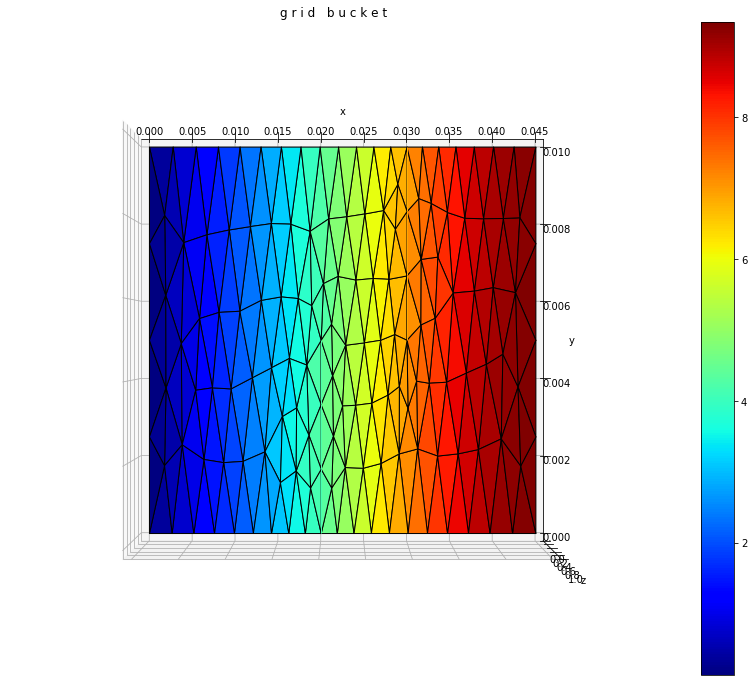

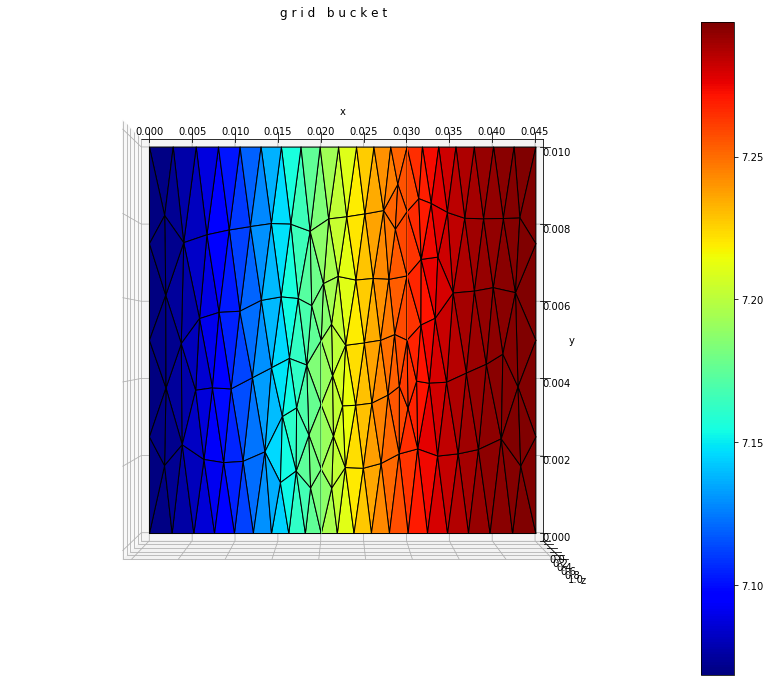

In [20]:

rd=np.zeros(tracer1.size)
#for i in range(10):
#for i in range(n_steps):
for i in range(1,n_steps+1,1):
    rd=reaction.compute_rd(tracer1,rd)
    if np.isclose((i-1) % save_every, 0):
            exporter1.write_vtu(export_field1, time_step=int((i-1) // save_every))
            exporter2.write_vtu(export_field2, time_step=int((i-1) // save_every))
            for g,d in gb:
                print("Ca")
                print(d[pp.STATE]["Ca"])
            for g,d in gb1:
                print("CaSiO3")
                print(d[pp.STATE]["CaSiO3"])
            print("FINE")
            print("rd")
            print(rd)
    
    #rd=reaction.compute_rd(tracer1,rd)
    tracer1 = IEsolver_Ca(rhs_mass_Ca * tracer1 + rhs_source_adv_Ca+rhs_mass_Ca*rd*tracer2*parameter["time_step"])
    tracer2 = IEsolver_CaSiO3(rhs_mass_Ca * tracer2 + rhs_source_adv_CaSiO3-rhs_mass_CaSiO3*rd*tracer2*parameter["time_step"])
    #tracer1 = IEsolver_Ca(rhs_mass_Ca * tracer1 + rhs_source_adv_Ca)
    #tracer2 = IEsolver_CaSiO3(rhs_mass_Ca * tracer2 + rhs_source_adv_CaSiO3)
    
    
    assembler_Ca.distribute_variable(
        tracer1,
        variable_names=[Ca,transport.mortar_variable],
    )
    assembler_CaSiO3.distribute_variable(
        tracer2,
        variable_names=[CaSiO3,transport.mortar_variable],
    )
    #print("tracer1")
    #print(tracer1)
    
exporter1.write_vtu(export_field1, time_step=(n_steps // save_every))
time_steps = np.arange(
    0, parameter["t_max"] + parameter["time_step"], save_every * parameter["time_step"]
)
    
exporter2.write_vtu(export_field2, time_step=(n_steps // save_every))
time_steps = np.arange(
    0, parameter["t_max"] + parameter["time_step"], save_every * parameter["time_step"]
)
exporter1.write_pvd(time_steps)
exporter2.write_pvd(time_steps)
transport.plot_tracer(Ca)
transport_CaSiO3.plot_tracer(CaSiO3)